<a href="https://colab.research.google.com/github/bismahashim/Assignment/blob/main/Assignment_Simple_Linear_Regression_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [88]:
data=pd.read_csv('delivery_time.csv')

In [89]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [91]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [92]:
data.shape

(21, 2)

In [93]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [94]:
data=data.drop_duplicates()
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


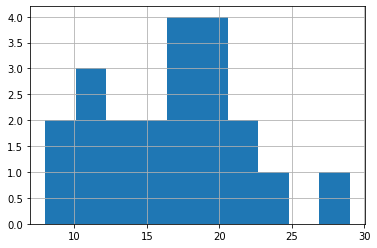

In [95]:
data['Delivery Time'].hist()

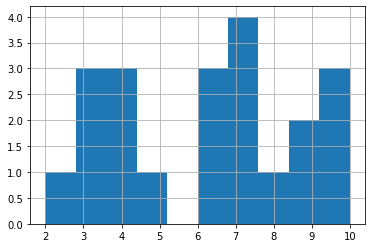

In [96]:
data['Sorting Time'].hist()

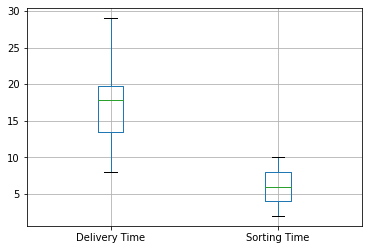

In [97]:
data.boxplot(column=['Delivery Time','Sorting Time'])

In [98]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


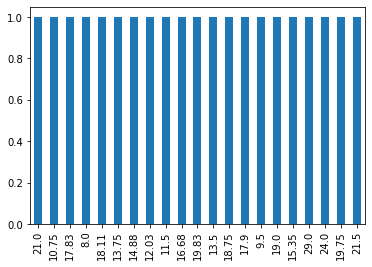

In [99]:
data['Delivery Time'].value_counts().plot.bar()

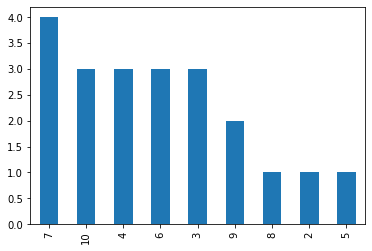

In [100]:
data['Sorting Time'].value_counts().plot.bar()

In [101]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


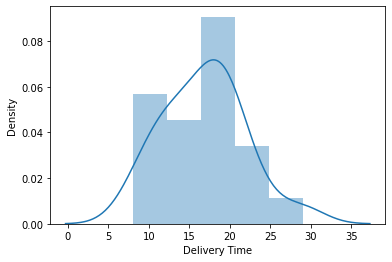

In [102]:
sns.distplot(data['Delivery Time'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


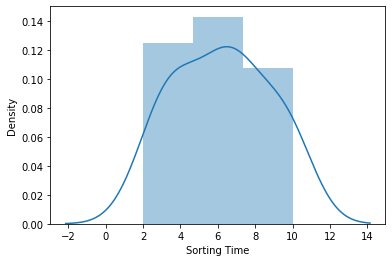

In [103]:
sns.distplot(data['Sorting Time'])

In [104]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [105]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [106]:
model = smf.ols("delivery_time~sorting_time",data=data).fit()

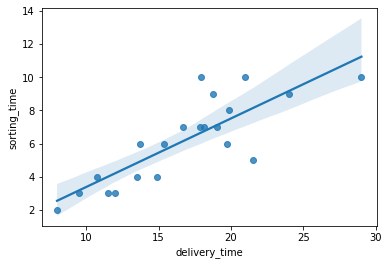

In [107]:
sns.regplot(x="delivery_time", y="sorting_time", data=data)

In [108]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [109]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        07:51:39   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
model.tvalues , model.pvalues


(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [111]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [112]:
pred = model.predict(data['sorting_time'])

In [113]:
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [114]:
pred.corr(data.delivery_time)

0.8259972607955325

# Transforming variables for accuracy


In [115]:
model2 = smf.ols('delivery_time~np.log(sorting_time)',data=data).fit()

In [116]:
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [117]:

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        07:51:53   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
print(model2.tvalues, '\n', model2.pvalues) 

Intercept               0.472460
np.log(sorting_time)    6.586789
dtype: float64 
 Intercept               0.641980
np.log(sorting_time)    0.000003
dtype: float64


In [119]:
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [120]:
pred2 = model2.predict(pd.DataFrame(data['sorting_time']))

In [121]:
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [122]:
model3 = smf.ols('np.log(delivery_time)~sorting_time',data=data).fit()

In [123]:
model3.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [124]:
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Mon, 19 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                           07:52:04   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
(model3.rsquared,model3.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

In [126]:
print(model3.tvalues, '\n', model3.pvalues)   

Intercept       20.601357
sorting_time     6.836088
dtype: float64 
 Intercept       1.857343e-14
sorting_time    1.592708e-06
dtype: float64


In [127]:
pred_log = model3.predict(pd.DataFrame(data['sorting_time']))

In [128]:
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [129]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [130]:
pred3.corr(data.delivery_time)

0.8085780108289259

In [131]:
print(model3.rsquared)

0.7109478980584187


In [132]:
print(model.rsquared)

0.6822714748417231


In [133]:
print(model2.rsquared)

0.6954434611324223


Hence we will consider the model having highest R-Squared value which is the log transformation - model3


In [134]:
import matplotlib.pyplot as plt

In [135]:
# getting residuals of the entire data set
student_resid = model3.resid_pearson 
student_resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Actual')

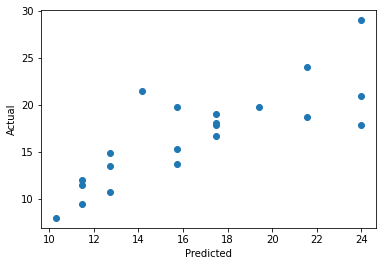

In [136]:
plt.scatter(x=pred3,y=data.delivery_time);plt.xlabel("Predicted");plt.ylabel("Actual")

 # Quadratic model


In [137]:
data["sorting_time_Sq"] = data.sorting_time*data.sorting_time


In [138]:
data.head()

,delivery_time,sorting_time,sorting_time_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [145]:
model_quad = smf.ols("delivery_time~sorting_time_Sq",data=data).fit()

In [146]:
model_quad.params

Intercept          11.237205
sorting_time_Sq     0.124870
dtype: float64

In [147]:
print(model_quad.tvalues, '\n', model_quad.pvalues)   

Intercept          9.398601
sorting_time_Sq    5.691330
dtype: float64 
 Intercept          1.415704e-08
sorting_time_Sq    1.739194e-05
dtype: float64


In [148]:
(model_quad.rsquared,model_quad.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

In [149]:
model_quad.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.74e-05
Time:                        07:53:00   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.2372      1.196      9.399      0.000       8.735      13.740
sorting_time_Sq     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
pred_quad = model_quad.predict(pd.DataFrame(data['sorting_time_Sq']))

In [151]:
pred_quad

0     23.724217
1     13.235127
2     15.732529
3     21.351685
4     23.724217
5     15.732529
6     17.355841
7     12.361036
8     23.724217
9     21.351685
10    19.228893
11    13.235127
12    17.355841
13    12.361036
14    12.361036
15    13.235127
16    15.732529
17    17.355841
18    11.736686
19    17.355841
20    14.358958
dtype: float64